#Case Study (Suicide Rates Overview 1985 to 2016)

In [1]:
#Loading the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing dataset
data = pd.read_csv('/content/master.csv')

In [3]:
# Checking the data head()
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# Check the data.describe
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
# Check the columns
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
# Checking the shape of the data
data.shape

(27820, 12)

In [7]:
# Count the datatypes
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [8]:
# Check the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
# Checking missing values in the dataset
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  #Total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # Percetnage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])   # Putting the above two together
    return missing_data     # return the datafram

missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [10]:
data[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].describe()   # Descriptive stats of continuous columns

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [11]:
# Frequency table for Age
# One way table
my_tab = pd.crosstab(index=data["age"],  # make a crosstab
                     columns="count")   # name the count column

my_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


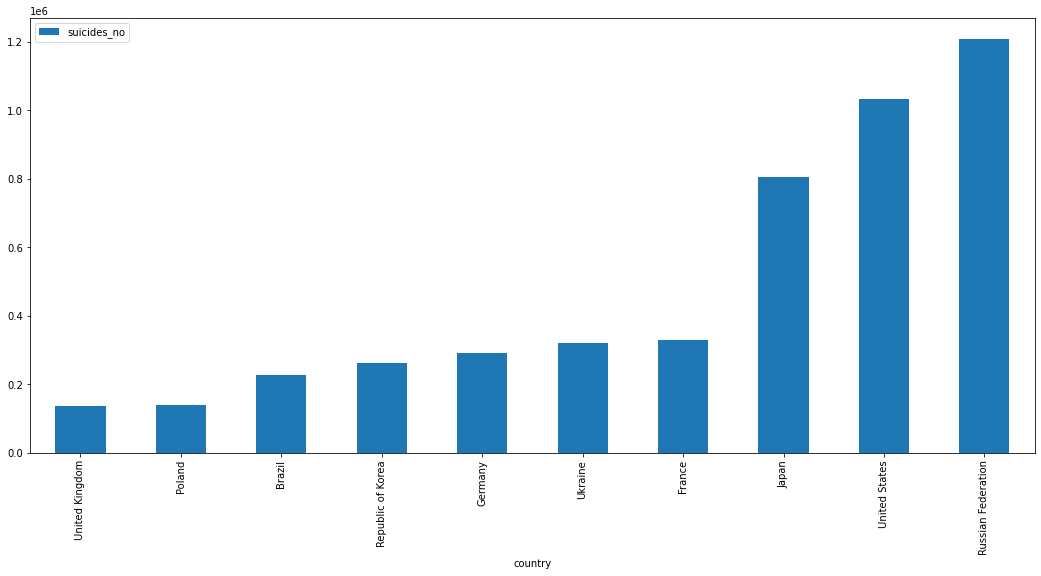

In [12]:
# Bar plot to check Number of Suicides by top Countries
# This is an example of "Numerical vs Categorical"
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',
                                                                                                            y='suicides_no',
                                                                                                            kind='bar',
                                                                                                            figsize=(18,8));



*    Russia has the highest number of suicides followed by US and Japan
*   Russia, The US and Japan have exceptionally high counts of suicides compared to the others in the plot



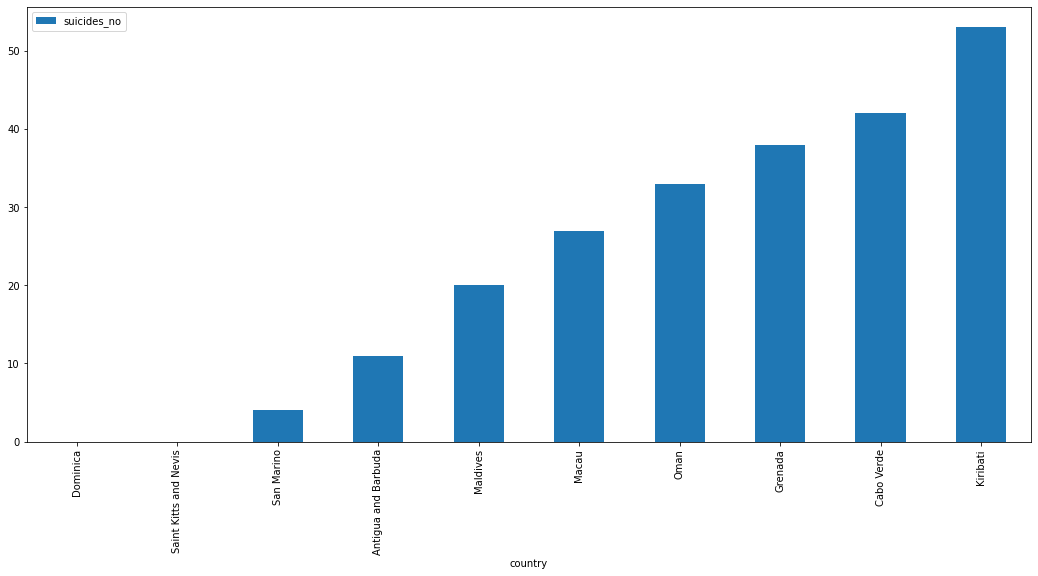

In [13]:
# Bar plot to check Number of Suicides by bottom Countries
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'], 
                    ascending=True).head(10).plot(x='country', y='suicides_no', kind='bar', figsize=(18,8));

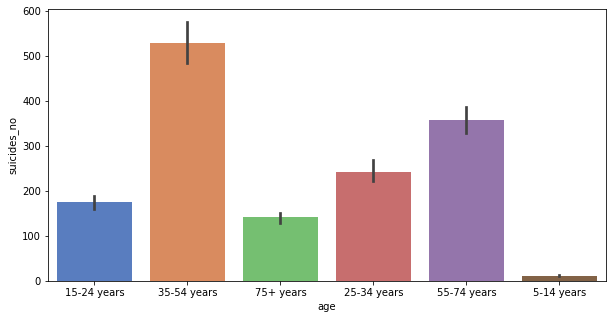

In [14]:
# Bar plot for Number of Suicides Vs Age
plt.figure(figsize=(10,5))  # Setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted'); # barplot

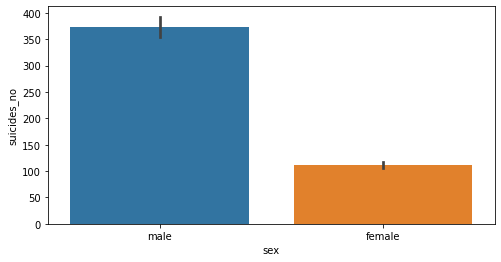

In [15]:
# Bar plot for Number of Suicides Vs Gender
plt.figure(figsize=(8,4))
ax = sns.barplot(x='sex', y='suicides_no', data=data);

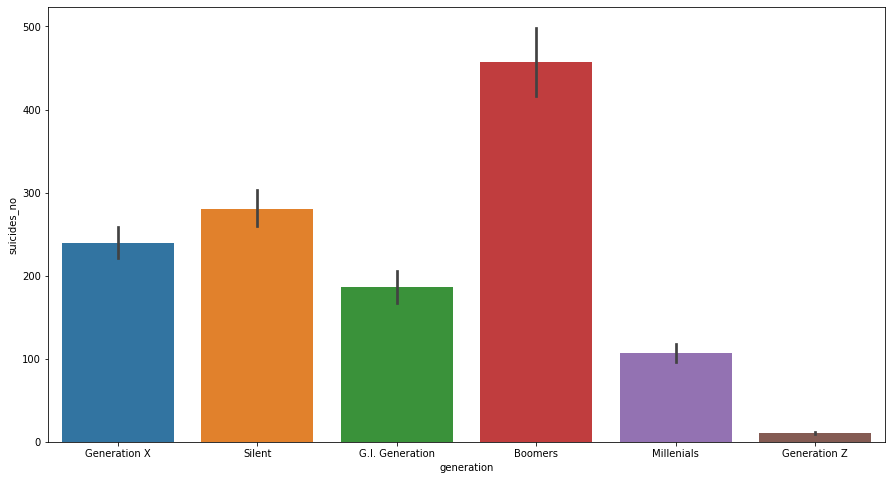

In [16]:
# Bar plot of Suicide Vs Generation
plt.figure(figsize=(15,8))
az = sns.barplot(x='generation', y='suicides_no', data=data);



*   Suicides are the highest among Boomers and lowest among Generation Z



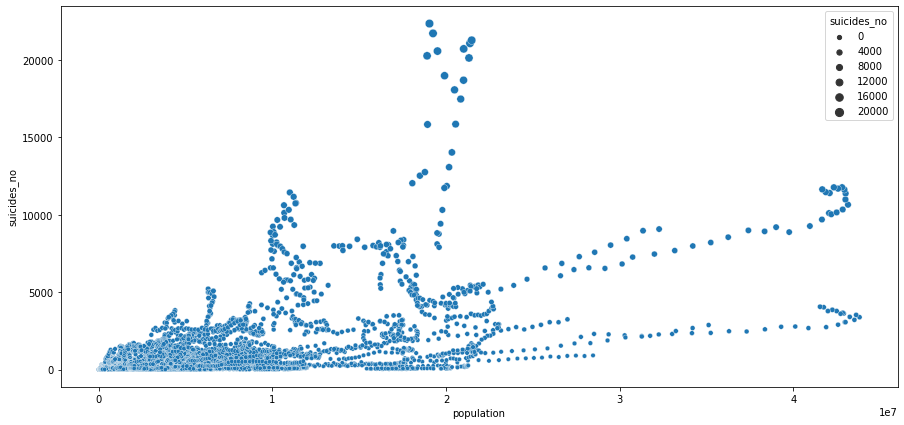

In [17]:
# Scatter plot Number of Suicides Vs Popultaion
# This is an example of Numerical Vs. Numerical
figure = plt.figure(figsize=(15,7))
ax = sns.scatterplot(x=data['population'], y='suicides_no', data=data, size='suicides_no');     # scatter plot

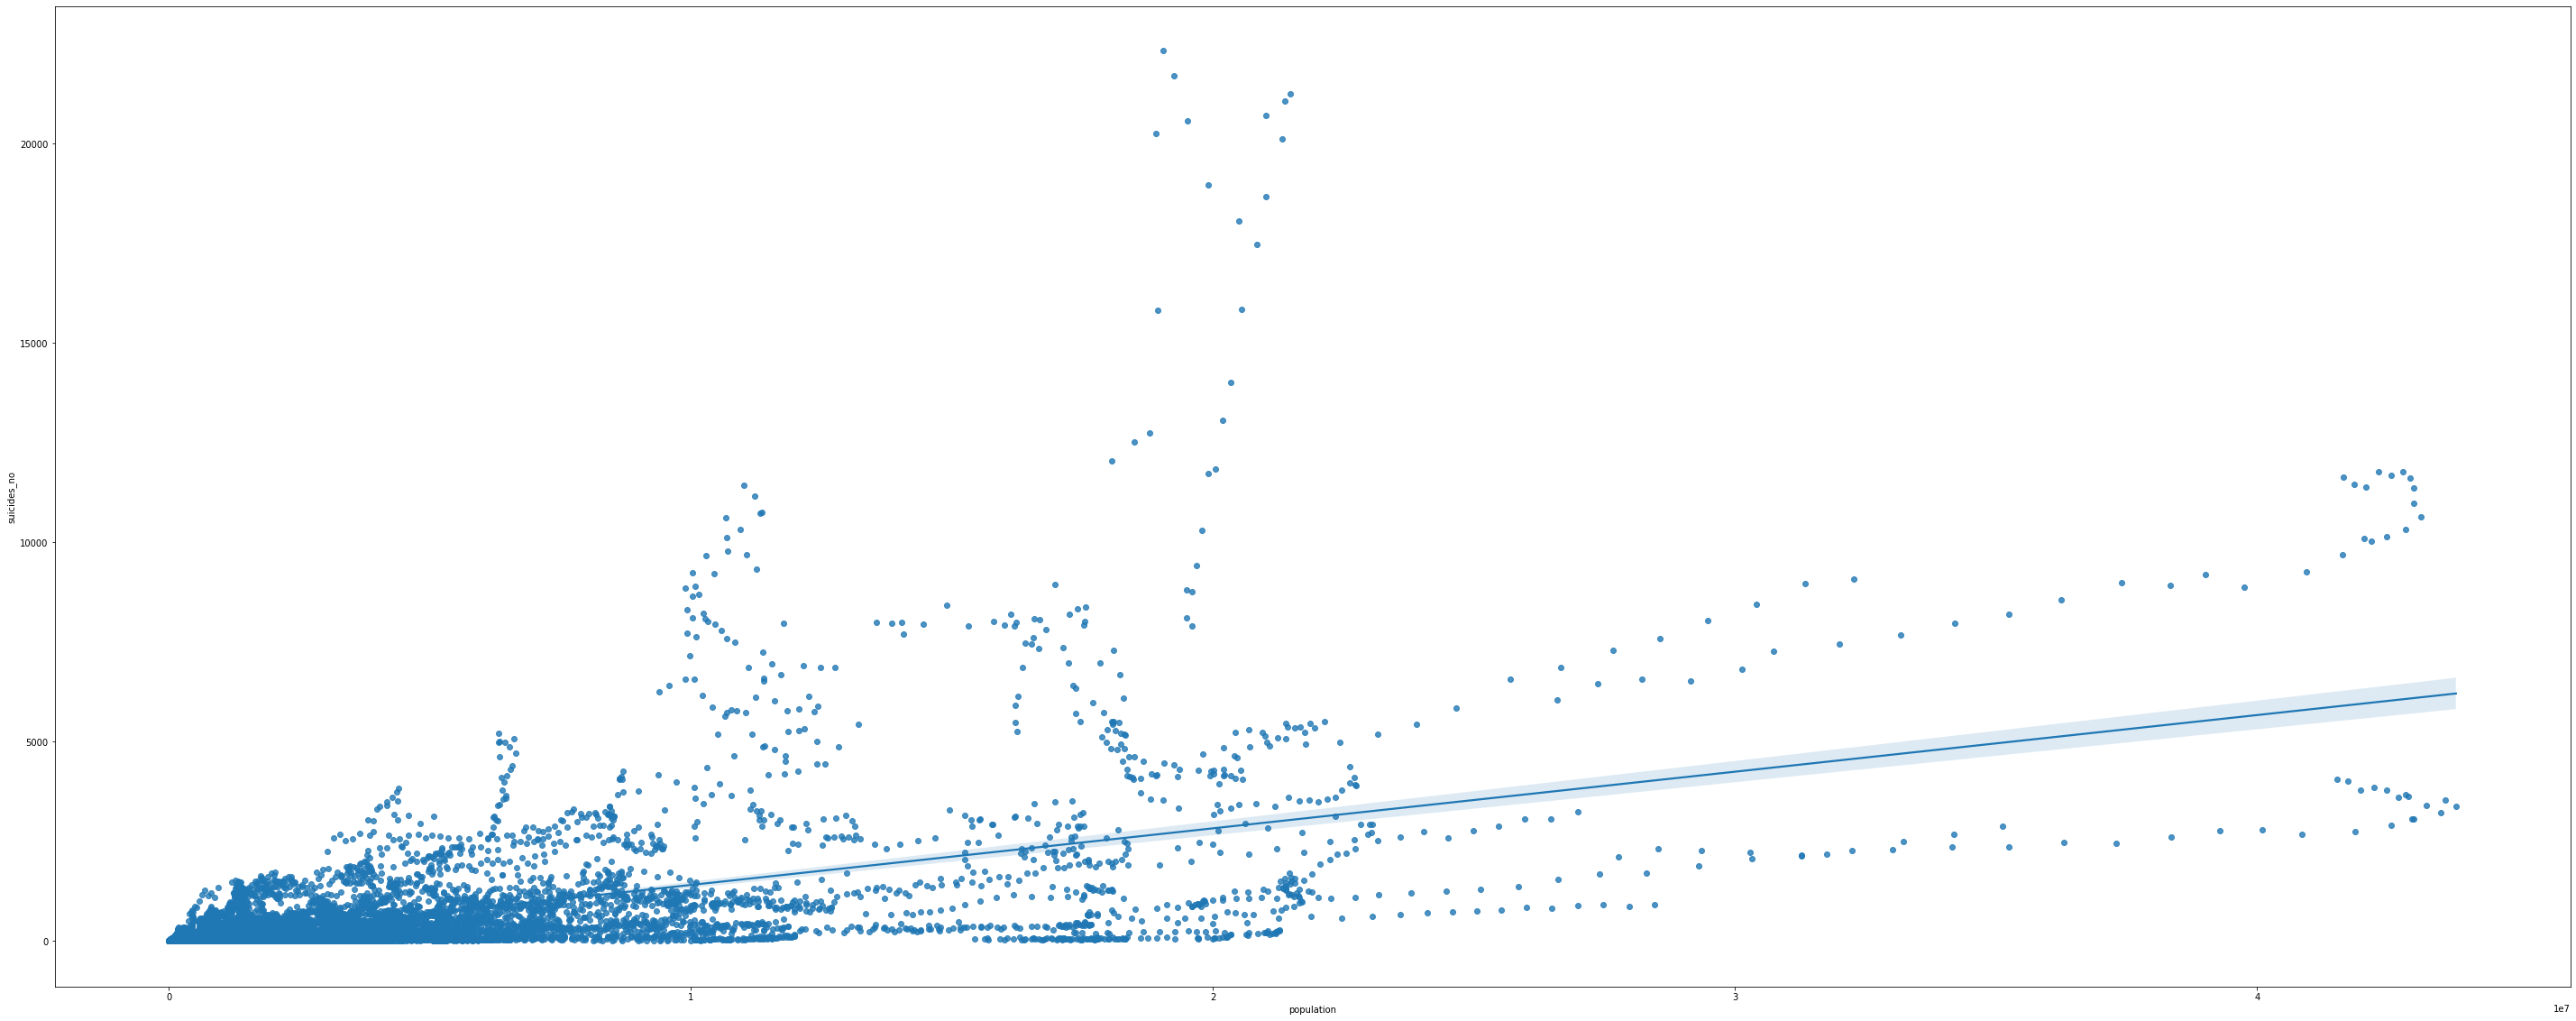

In [18]:
figure = plt.figure(figsize=(50,20))

ax = sns.regplot(x='population', y='suicides_no', data=data); # regression plot - scatter plot with a regression line

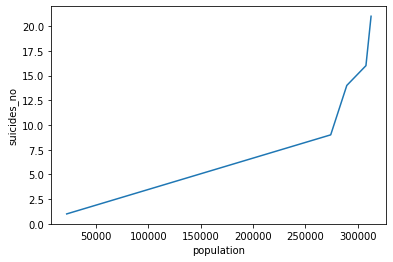

In [19]:
# Plotting a lineplot here
sns.lineplot(x='population', y='suicides_no', data=data.head());

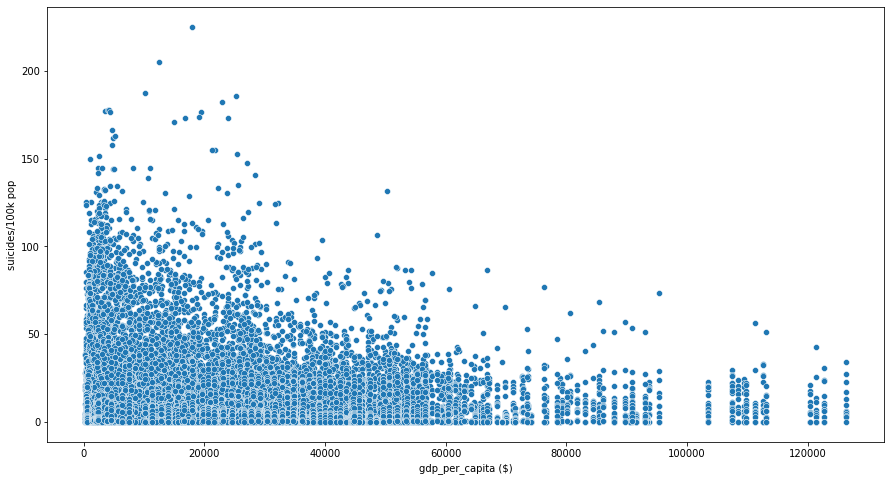

In [20]:
# Scatter plot Number of Suicides/100kPopulation Vs GDP per capita
figure = plt.figure(figsize=(15,8))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data); # scatter plot



*   Looks like higher suicide rates are a bit more prevalent in countries with higher GDP
*   However,  it doesn't look like there any significant correlation between the two

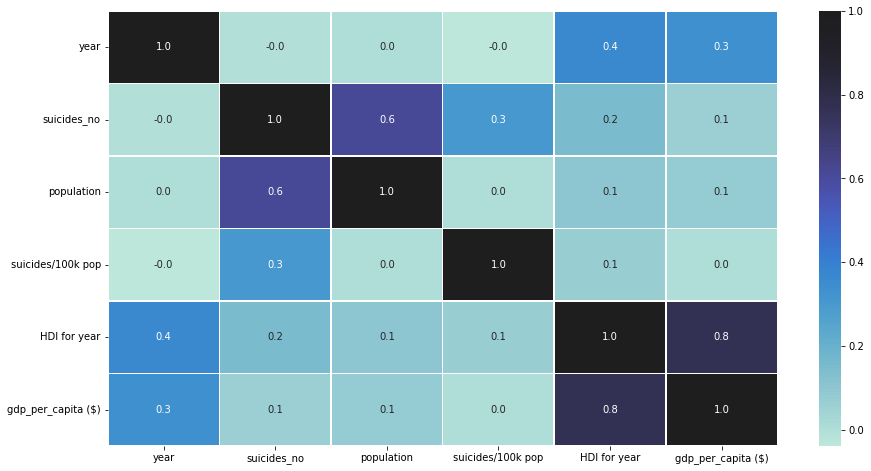

In [24]:
# Correlation  among pairs of continuous variables
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.1f', center=1); # heat map



*   Instead of doing a simple `df.corr()`, we can use the heat map when there are large number of variables.
*   The color helps with picking out the most correlated easily
*   In the above case, we don't have a lot of variables . The plot is just for demonstration
*   The darker the color higher the correlation
*   None of the attributes seem have correlation of real significance
*   Some obvious correlations are that in a larger population, it is very likely that number of suicides will be more
*   Human development index  - gdp per capita is the omly pair with the most correlation



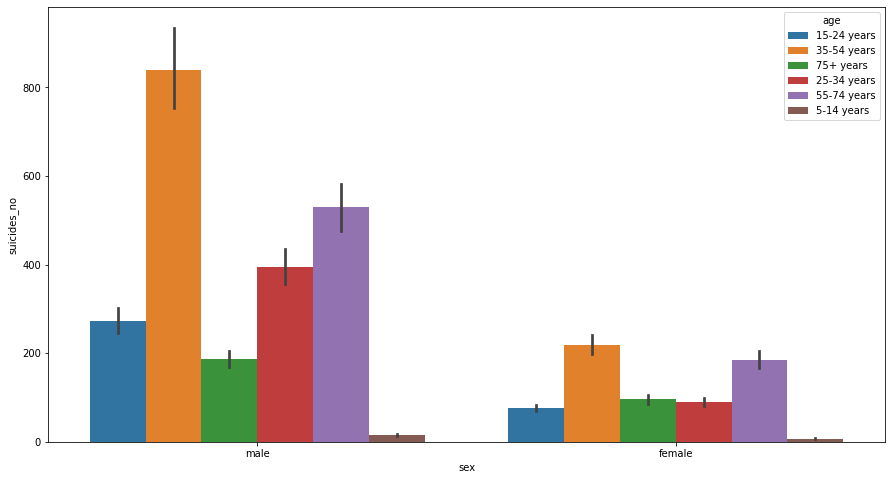

In [26]:
# Bar plot to check Number of suicides by sex and age (three variables used to generate a single plot)
# This is an example of Numerical and 2 Categorical variables
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='sex', y='suicides_no', hue='age');

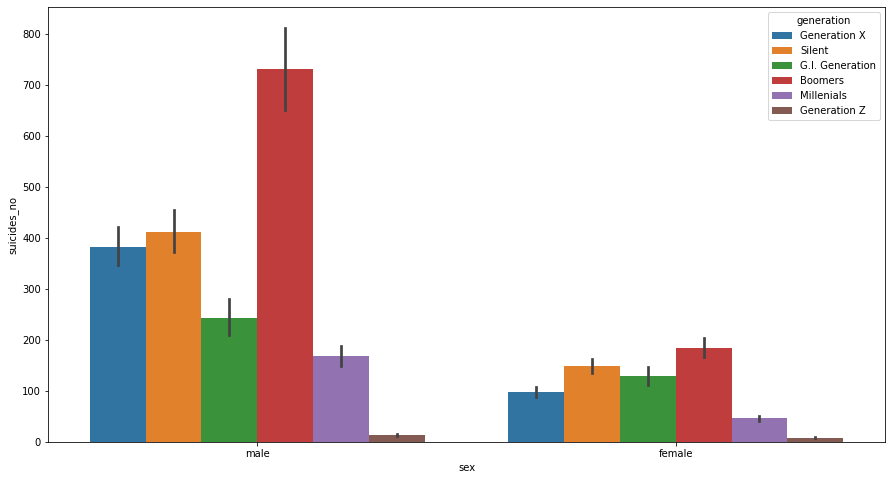

In [27]:
# Bar plot to check Number of suicides by sex and Generation (three variables used to generate a single plot)
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='sex', y='suicides_no', hue='generation');



*   Suicides in males apart from being higher, has a slight variation in distribution across generations compared to the suicides of females across generation
*   In case of males, Generation X has higher suicide numbers compared to G.I Generation but in case of females it is opposite



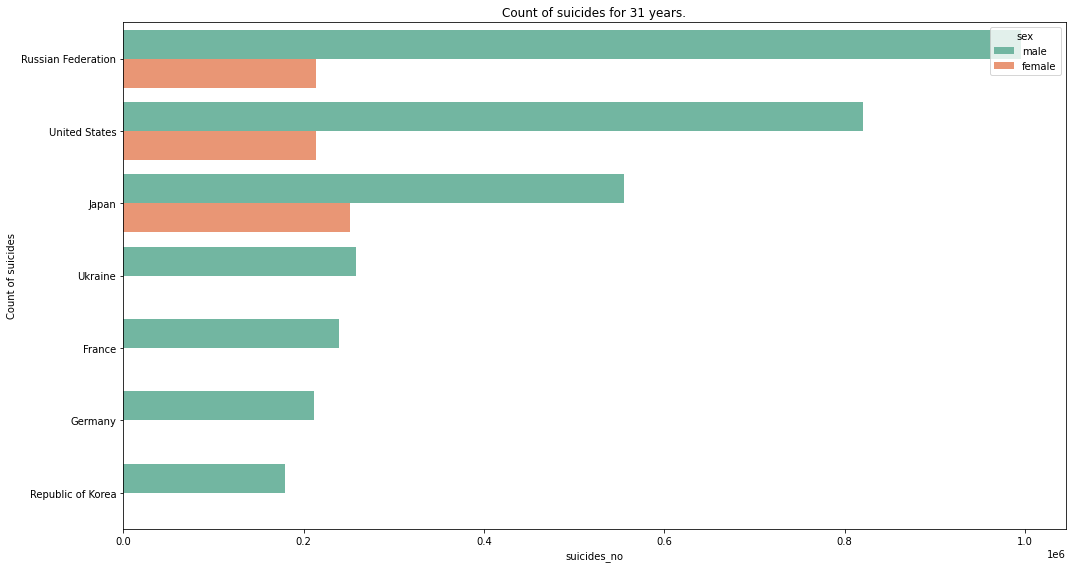

In [33]:
# Checking the Number of Suicides: Country Vs Sex
suic_sum_m = data['suicides_no'].groupby([data['country'], data['sex']]).sum() # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no', ascending=False) # sort in descending number
most_cont_m = suic_sum_m.head(10)   # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,8))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country', x='suicides_no', hue='sex', data=most_cont_m, palette='Set2')

plt.ylabel('Count of suicides')
plt.tight_layout()




*   Japan has a higher proportion of female suicides compared to the coutries with overall suicide rates even more high



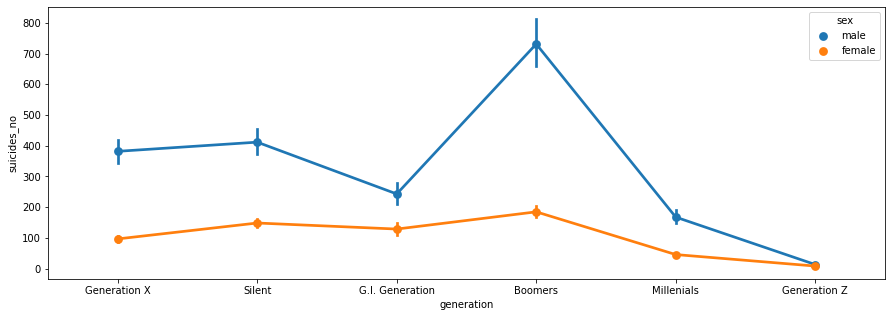

In [34]:
# Average number of suicides across each generation for a given gender along with the confidance intervals - Point Plot
plt.figure(figsize=(15,5))

sns.pointplot(x='generation', y='suicides_no', hue='sex', data=data);



*   The graph tells us the average suicides along with the confidance intervals
*   Suicides among females in general don't seem to be fluctuating a lot
*   Average suicides of Gen Z are almost equally distributed across genders


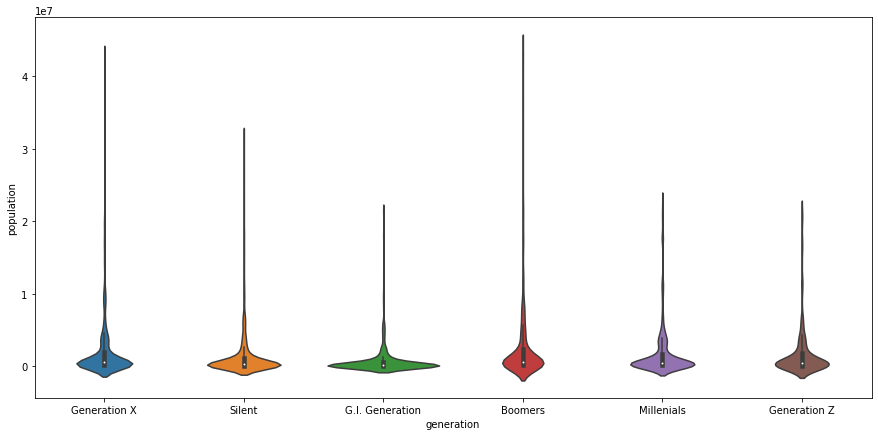

In [35]:
# Distribution of population across each generation - Violin Plot
plt.figure(figsize=(15,7))
sns.violinplot(x=data.generation, y=data['population']);



*   The plot is similar to a box plot but here, we get a density function
*   Distribution of population across every generation is highly skewed
*   Potential of lot of outliers



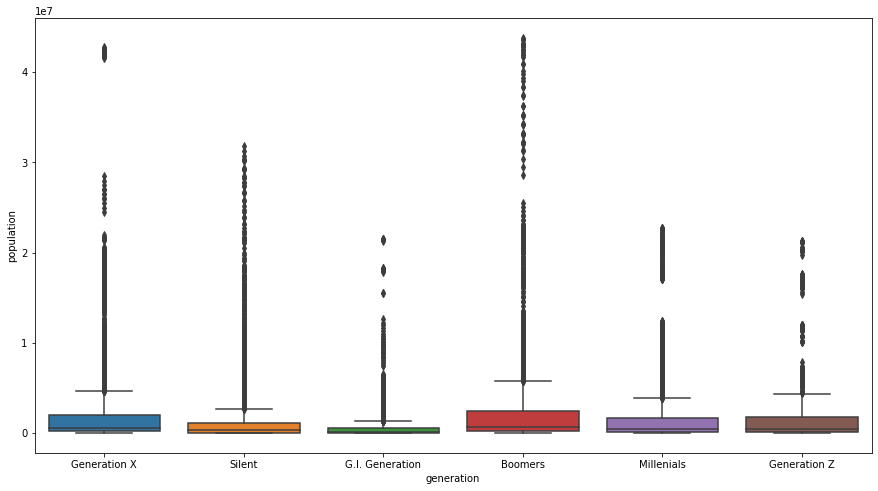

In [36]:
# Checking Outliers - Box Plot
plt.figure(figsize=(15,8))
sns.boxplot(x=data.generation, y=data['population']);

# Checking trends with Temporal Data

Temporal data is simply data that represents a state in time, such as the land-use patterns of Hong Kong in 1990, or total rainfall in Honolulu on July 1, 2009. Temporal data is collected to analyze weather patterns and other environmental variables, monitor traffic conditions, study demographic trends, and so on. This data comes from many sources ranging from manual data entry to data collected using observational sensors or generated from simulation models.


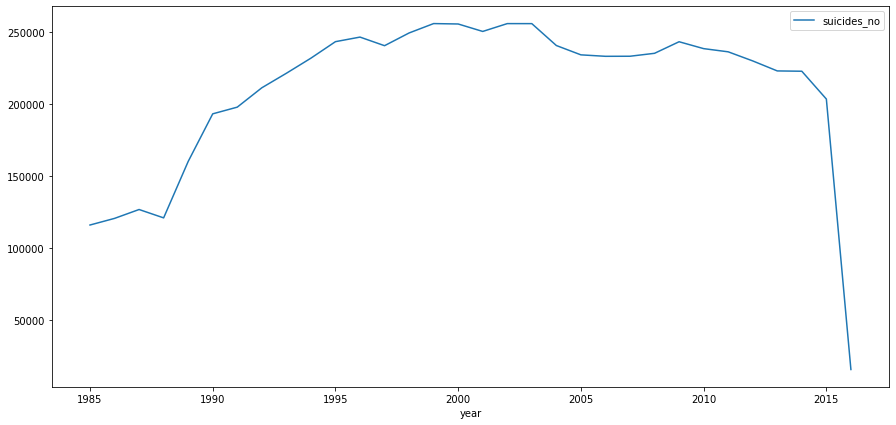

In [37]:
# Checking pattern using Trend plot (1985-2015) suicide Rate Vs Years
data[['year', 'suicides_no']].groupby(['year']).sum().plot(figsize=(15,7));

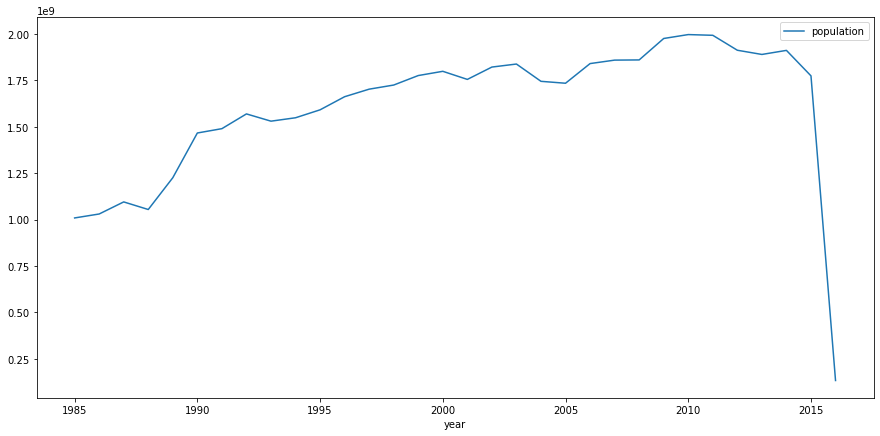

In [38]:
# Checking pattern using Trend plot (1985-2015) Population Vs Years
data[['year', 'population']].groupby(['year']).sum().plot(figsize=(15,7));

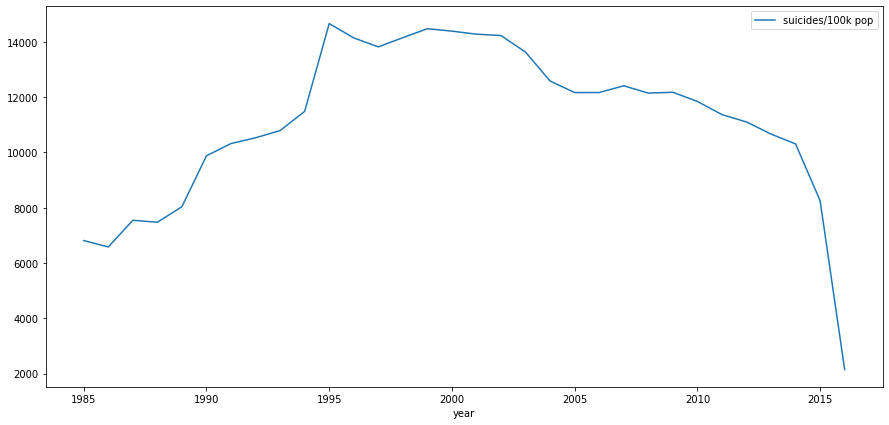

In [39]:
# Checking pattern using Trend plot (1985-2015) suicides/100k pop Vs Years
data[['year', 'suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,7));